# 线性回归 - Linear Regreesion

此Notebook是配合Andrew Ng "Machine Leanring"中[线性回归](https://github.com/loveunk/machine-learning-deep-learning-notes/blob/master/machine-learning/linear-regression.md)部分学习使用。

测试用python版本为3.6
* 机器学习路径：https://github.com/loveunk/machine-learning-deep-learning-notes/
* 内容正文综合参考网络资源，使用中如果有疑问请联络：www.kaikai.ai

In [2]:
!pip install seaborn

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -------------- ------------------------- 2.9/8.1 MB 13.2 MB/s eta 0:00:01
   ------------------------- -------------- 5.2/8.1 MB 12.1 MB/s eta 0:00:01
   ------------------------------------- -- 7.6/8.1 MB 11.8 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 11.4 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   -------------------------------- ------- 1.8/2.2 MB 11.3 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 9.8 MB/s eta 0:00:00


In [31]:
!pip install scikit-learn

In [3]:
import pandas as pd
import seaborn as sns
sns.set(context="notebook", style="whitegrid", palette="dark")
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv('ex1data1.txt', names=['population', 'profit']) # 读取数据并赋予列名

In [5]:
df.head() # 显示数据前五行

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [6]:
df.info() # 打印df的class信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   population  97 non-null     float64
 1   profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


In [7]:
df.describe() # 打印df的统计信息

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


***
# 看下原始数据

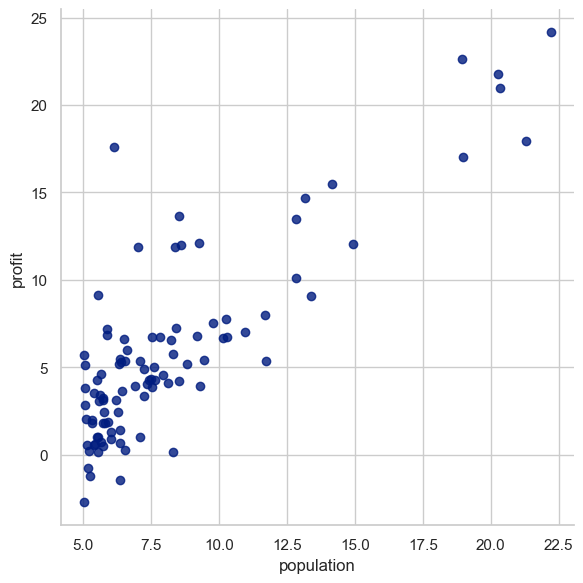

In [11]:
sns.lmplot(x='population', y='profit', data=df, height=6, fit_reg=False)
plt.show()

In [17]:
def get_X(df): # 读取特征
#     """
#     use concat to add intersect feature to avoid side effect
#     not efficient for big dataset though
#     """
    ones = pd.DataFrame({'ones': np.ones(len(df))})#ones是m行1列的dataframe
    data = pd.concat([ones, df], axis=1)  # 合并数据，根据列合并
    return data.iloc[:, :-1].values  # 这个操作返回 ndarray,不是矩阵 # 或者使用 .to_numpy()


def get_y(df):#读取标签
#     '''assume the last column is the target'''
    return df.iloc[:, -1].values#df.iloc[:, -1].values是指df的最后一列


def normalize_feature(df):
#     """Applies function along input axis(default 0) of DataFrame."""
    return df.apply(lambda column: (column - column.mean()) / column.std())#特征缩放

多变量的假设 h 表示为：${{h}_{\theta }}\left( x \right)={{\theta }_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}$。

这个公式中有n+1个参数和n个变量，为了使得公式能够简化一些，引入${{x}_{0}}=1$，则公式转化为：  ${{h}_{\theta }}\left( x \right)={{\theta }_{0}x_0}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}$。

此时模型中的参数是一个n+1维的向量，任何一个训练实例也都是n+1维的向量，特征矩阵X的维度是 m*(n+1)。 因此公式可以简化为：${{h}_{\theta }}\left( x \right)={{\theta }^{T}}X$，其中上标T代表矩阵转置。


# 计算代价函数
$$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$

其中：

$${{h}_{\theta }}\left( x \right)={{\theta }^{T}}X={{\theta }_{0}}{{x}_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}$$

In [18]:
# 查看数据维度
data = df
X = get_X(data)
print(X.shape, type(X))

y = get_y(data)
print(y.shape, type(y))


(97, 2) <class 'numpy.ndarray'>
(97,) <class 'numpy.ndarray'>


In [19]:
theta = np.zeros(X.shape[1]) # X.shape[1]=2, 代表特征数n
print(theta)

[0. 0.]


In [20]:
def lr_cost(theta, X, y):
    """ 计算代价函数
    X: R(m*n), m 样本数, n 特征数
    y: R(m)
    theta : R(n), 线性回归的参数
    """
    m = X.shape[0]#m为样本数

    inner = X @ theta - y  # R(m*1)，X @ theta等价于X.dot(theta)

    # 1*m @ m*1 = 1*1 in matrix multiplication
    # but you know numpy didn't do transpose in 1d array, so here is just a
    # vector inner product to itselves
    square_sum = inner.T @ inner
    cost = square_sum / (2 * m)

    return cost

In [21]:
lr_cost(theta, X, y) # 返回cost的值

np.float64(32.072733877455676)

# 批量梯度下降 - Batch Gradient Decent
$$\begin{aligned}{{\theta }_{j}} &:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta  \right) \\ &:= {{\theta }_{j}}-\alpha \frac{1}{m} \sum^{m}_{i=1}\left( h_\theta \left(x^{(i)}\right) -y^{(i)}  \right)x^{(i)}_j \end{aligned}$$
注意：对于所有的$j$，需要同时更新$\theta_j$。

In [22]:
def gradient(theta, X, y):
  """
  计算梯度，也就是 J(θ)的偏导数
  """
  m = X.shape[0]

  inner = X.T @ (X @ theta - y)  # (m,n).T @ (m, 1) -> (n, 1)，X @ theta等价于X.dot(theta)

  return inner / m

In [23]:
def batch_gradient_decent(theta, X, y, epoch, alpha=0.01):
  """
  批量梯度下降函数。拟合线性回归，返回参数和代价
    epoch: 批处理的轮数
  """
  cost_data = [lr_cost(theta, X, y)]
  _theta = theta.copy()  # 拷贝一份，不和原来的theta混淆

  for _ in range(epoch):
    _theta = _theta - alpha * gradient(_theta, X, y)
    cost_data.append(lr_cost(_theta, X, y))

  return _theta, cost_data

In [24]:
epoch = 500
final_theta, cost_data = batch_gradient_decent(theta, X, y, epoch)

In [25]:
final_theta
#最终的theta

array([-2.28286727,  1.03099898])

In [26]:
cost_data
# 看下代价数据

[np.float64(32.072733877455676),
 np.float64(6.737190464870009),
 np.float64(5.931593568604956),
 np.float64(5.901154707081388),
 np.float64(5.895228586444221),
 np.float64(5.890094943117332),
 np.float64(5.885004158443646),
 np.float64(5.8799324804914175),
 np.float64(5.874879094762575),
 np.float64(5.869843911806386),
 np.float64(5.864826865312929),
 np.float64(5.859827889932181),
 np.float64(5.85484692057229),
 np.float64(5.849883892376587),
 np.float64(5.844938740722034),
 np.float64(5.840011401218361),
 np.float64(5.835101809707226),
 np.float64(5.830209902261388),
 np.float64(5.825335615183862),
 np.float64(5.820478885007099),
 np.float64(5.815639648492152),
 np.float64(5.810817842627869),
 np.float64(5.806013404630044),
 np.float64(5.801226271940628),
 np.float64(5.796456382226899),
 np.float64(5.7917036733806535),
 np.float64(5.786968083517396),
 np.float64(5.782249550975539),
 np.float64(5.777548014315596),
 np.float64(5.772863412319381),
 np.float64(5.768195683989212),
 np.fl

In [27]:
# 计算最终的代价
lr_cost(final_theta, X, y)

np.float64(4.713809531116866)

scikit-learn model的预测表现

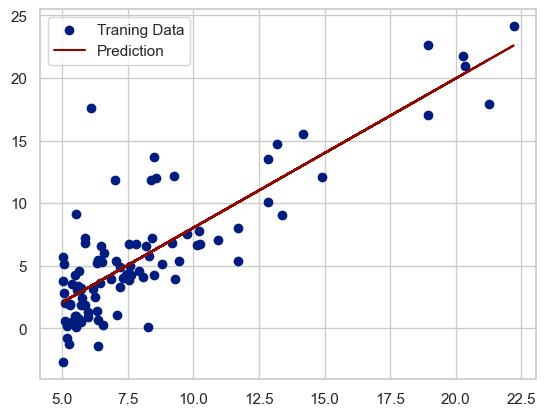

In [32]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X, y)

x = X[:, 1]
f = model.predict(X).flatten()

plt.scatter(X[:,1], y, label='Traning Data')
plt.plot(x, f, 'r', label='Prediction')
plt.legend(loc=2)
plt.show()

# 代价数据可视化

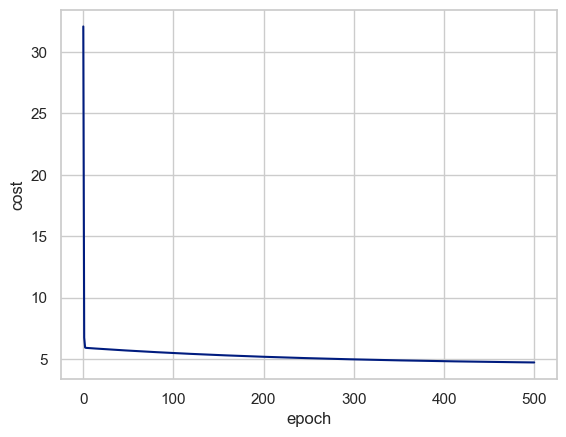

In [37]:
ax = sns.lineplot(x=np.arange(epoch+1),y=cost_data)
ax.set_xlabel('epoch')
ax.set_ylabel('cost')
plt.show()
#可以看到从第二轮代价数据变换很大，接下来平稳了

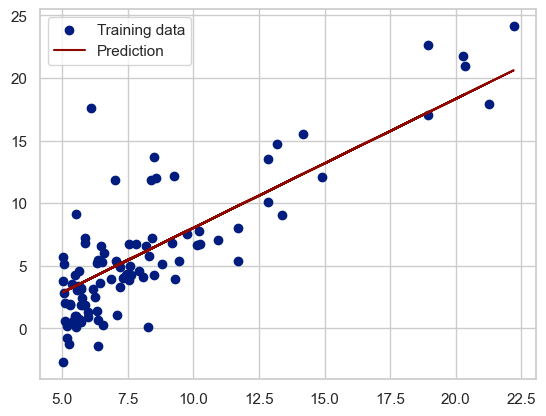

In [38]:
b = final_theta[0] # intercept，Y轴上的截距
m = final_theta[1] # slope，斜率

plt.scatter(data.population, data.profit, label="Training data")
plt.plot(data.population, data.population*m + b, 'r', label="Prediction")
plt.legend(loc=2)
plt.show()

# 3- 选修章节

In [39]:
raw_data = pd.read_csv('ex1data2.txt', names=['square', 'bedrooms', 'price'])
raw_data.head()

,square,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


# 标准化数据
最简单的方法是令：

 

其中  是平均值，sn 是标准差。


In [40]:
def normalize_feature(df):
#     """Applies function along input axis(default 0) of DataFrame."""
    return df.apply(lambda column: (column - column.mean()) / column.std())

In [41]:
data = normalize_feature(raw_data)
data.head()

,square,bedrooms,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


# 2. 多变量批量梯度下降 -  Multi-var batch gradient decent

In [42]:
X = get_X(data)
print(X.shape, type(X))

y = get_y(data)
print(y.shape, type(y)) #看下数据的维度和类型

(47, 3) <class 'numpy.ndarray'>
(47,) <class 'numpy.ndarray'>


In [43]:
alpha = 0.01 #学习率
theta = np.zeros(X.shape[1]) #X.shape[1]：特征数n
epoch = 500  #迭代次数

In [44]:
final_theta, cost_data = batch_gradient_decent(theta, X, y, epoch, alpha=alpha)

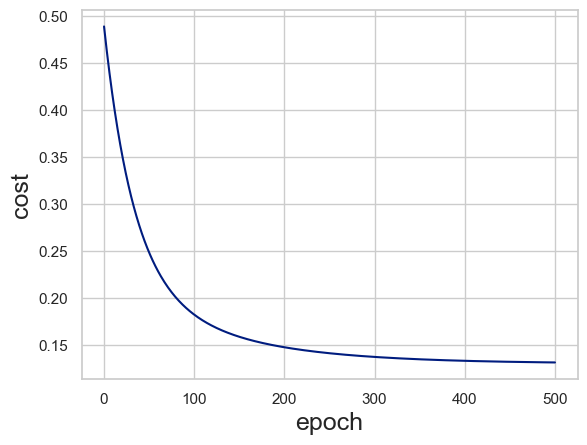

In [46]:
sns.lineplot(x=np.arange(len(cost_data)), y = cost_data)
plt.xlabel('epoch', fontsize=18)
plt.ylabel('cost', fontsize=18)
plt.show()

In [47]:
final_theta

array([-1.16679716e-16,  8.30383883e-01,  8.23982853e-04])

Scikit-learn 的预测

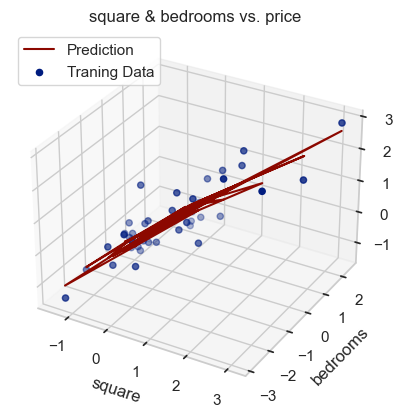

In [48]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(X, y)

f = model.predict(X).flatten()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(X[:,1], X[:,2], f, 'r', label='Prediction')
ax.scatter(X[:,1], X[:,2], y, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('square')
ax.set_ylabel('bedrooms')
ax.set_zlabel('price')
ax.set_title('square & bedrooms vs. price')
#ax.view_init(30, 10)
plt.show()

# 3. 学习率 - Learning rate

In [49]:
base = np.logspace(-1, -5, num=4)
candidate = np.sort(np.concatenate((base, base*3)))
print(candidate)

[1.00000000e-05 3.00000000e-05 2.15443469e-04 6.46330407e-04
 4.64158883e-03 1.39247665e-02 1.00000000e-01 3.00000000e-01]


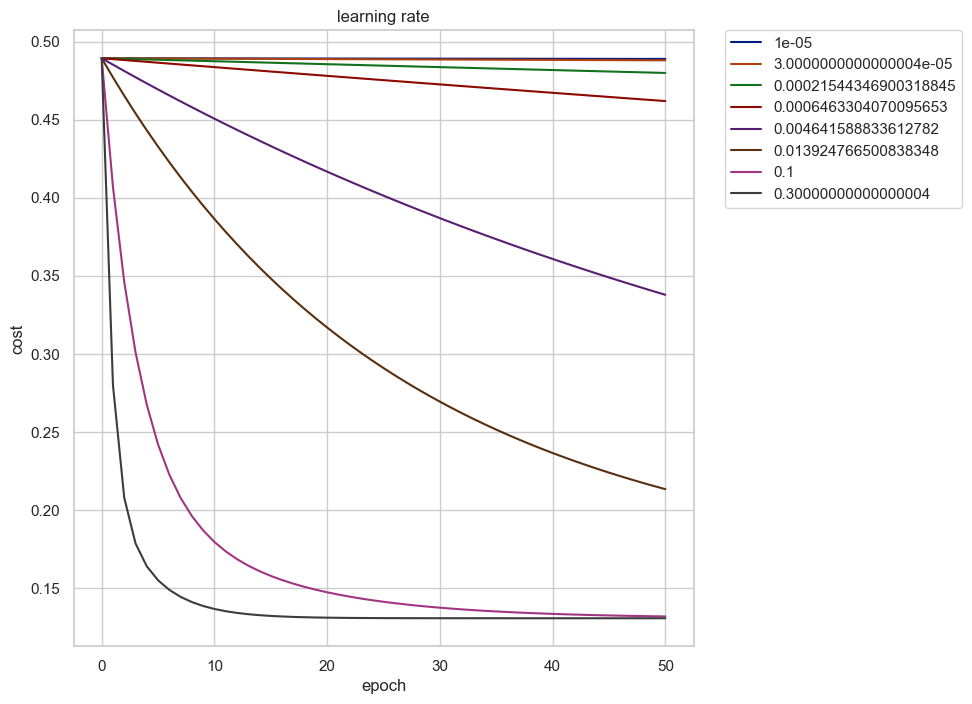

In [51]:
epoch=50

fig, ax = plt.subplots(figsize=(8, 8))

for alpha in candidate:
    _, cost_data = batch_gradient_decent(theta, X, y, epoch, alpha=alpha)
    ax.plot(np.arange(epoch+1), cost_data, label=alpha)

ax.set_xlabel('epoch', fontsize=12)
ax.set_ylabel('cost', fontsize=12)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title('learning rate', fontsize=12)
plt.show()

可以看到最合适的learning rate是0.3

# 4. 正规方程 - Normal equation
正规方程是通过求解下面的方程来找出使得代价函数最小的参数的：$\frac{\partial }{\partial {{\theta }_{j}}}J\left( {{\theta }_{j}} \right)=0$ 。
 假设我们的训练集特征矩阵为 X（包含了${{x}_{0}}=1$）并且我们的训练集结果为向量 y，则利用正规方程解出向量 $\theta ={{\left( {{X}^{T}}X \right)}^{-1}}{{X}^{T}}y$ 。
上标T代表矩阵转置，上标-1 代表矩阵的逆。设矩阵$A={{X}^{T}}X$，则：${{\left( {{X}^{T}}X \right)}^{-1}}={{A}^{-1}}$

梯度下降与正规方程的比较：

梯度下降：需要选择学习率α，需要多次迭代，当特征数量n大时也能较好适用，适用于各种类型的模型	

正规方程：不需要选择学习率α，一次计算得出，需要计算${{\left( {{X}^{T}}X \right)}^{-1}}$，如果特征数量n较大则运算代价大，因为矩阵逆的计算时间复杂度为O(n3)，通常来说当n小于10000 时还是可以接受的，只适用于线性模型，不适合逻辑回归模型等其他模型



In [52]:
# 正规方程
def normalEqn(X, y):
    theta = np.linalg.inv(X.T@X)@X.T@y#X.T@X等价于X.T.dot(X)
    return theta

In [54]:
final_theta2=normalEqn(X, y)#感觉和批量梯度下降的theta的值有点差距
final_theta2

array([-1.11022302e-16,  8.84765988e-01, -5.31788197e-02])

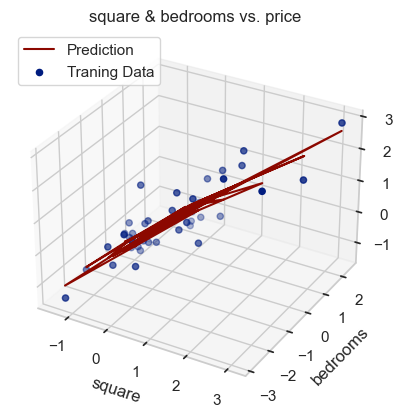

In [55]:
f = final_theta2[0] + final_theta2[1] * X[:,1] + final_theta2[2] * X[:,2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(X[:,1], X[:,2], f, 'r', label='Prediction')
ax.scatter(X[:,1], X[:,2], y, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('square')
ax.set_ylabel('bedrooms')
ax.set_zlabel('price')
ax.set_title('square & bedrooms vs. price')
#ax.view_init(30, 10)
plt.show()